# 1. Two-dimensional data

In [112]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from scipy.stats import norm
from scipy.stats import multivariate_normal

SAMPLES = 700
NOISE = 0.1

# Generate the data
X, _ = make_moons(n_samples=SAMPLES, noise=NOISE)

# set seed
np.random.seed(0)


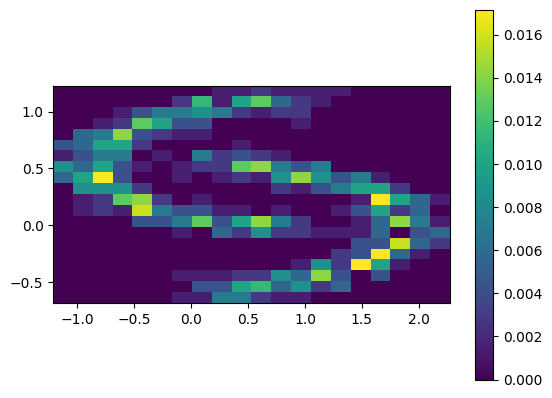

[[0.         0.         0.         0.         0.         0.
  0.00142857 0.00142857 0.00714286 0.00714286 0.00285714 0.00142857
  0.00142857 0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.00428571 0.00428571 0.01       0.01142857 0.00571429
  0.00857143 0.00285714 0.00571429 0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.00142857 0.00142857 0.00142857 0.00285714 0.00285714 0.00857143
  0.00571429 0.01428571 0.00428571 0.         0.00428571 0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00142857 0.00857143 0.00285714 0.01714286 0.01       0.00142857
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.00

In [113]:
def histogram(BINS, n_samples, visualize = False):
    X, _ = make_moons(n_samples=n_samples, noise=NOISE)
    # Create a 2D histogram
    hist, x_edges, y_edges = np.histogram2d(X[:, 0], X[:, 1], bins=BINS)
    # reserve the pdf for later use
    pdf = hist / hist.sum()

    if visualize:# Visualize the histogram
        plt.imshow(pdf, interpolation='nearest', origin='lower', extent=[x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]])
        plt.colorbar()
        plt.show()
    return pdf

_, x_edges, y_edges = np.histogram2d(X[:, 0], X[:, 1], bins=20)
pdf = histogram(20, 700, True)
print(pdf)

<div style="color: green; font-weight: bold">
We implemented the Histogram as a function rather than a class. 
A class is certainly more elegant. It is more flexible for example because it can be initiated first and then reused later, even multiple times. 
We used "np.histogram2d" instead of programming the steps ourselves. It is usually better to use predefined algorithms as they are the most optimized ones (and there was no regulation against using this). 
The sampling algorithm are at a later point of the code in our case. On the one hand it is neat to have these as methods of your class. On the other hand we were able to write the code such that it works for all the predictors and thereby write the code only once instead of writing the same / very similar code 3+ times.
We do not have a prediction algorithm, as it was not called for.
We have a visualisation code which was not called for, but it is still useful to get a feel of the used predictors when needed. This is better than the ideal solution. 
</div>

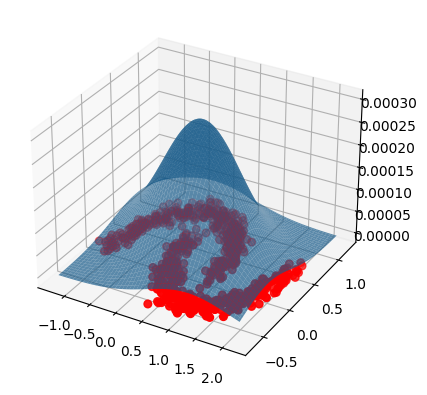

In [114]:
# # using the hist data from above
# x, y = np.meshgrid(x_edges, y_edges)

# # Fit a Gaussian to the histogram data
# x_mean = np.mean(X[:, 0])
# x_std = np.std(X[:, 0])
# y_mean = np.mean(X[:, 1])
# y_std = np.std(X[:, 1])
# pdf = norm.pdf(x, loc=x_mean, scale=x_std) * norm.pdf(y, loc=y_mean, scale=y_std)
# print(pdf.shape)
# # Visualize the 3D plot
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(X[:, 0], X[:, 1], np.zeros(len(X)), c='r', marker='o', s=30, label="Data Points")
# ax.plot_surface(x, y, pdf, alpha=0.7)

# plt.show()

from scipy.stats import multivariate_normal

# 2D Gaussian
def gaussian(n_samples, visualize = False):
  X, _ = make_moons(n_samples=n_samples, noise=NOISE)
  
  mean = np.mean(X, axis=0)
  cov = np.cov(X.T)
  
  # Create a grid for visualization
  x, y = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100), np.linspace(X[:, 1].min(), X[:, 1].max(), 100))
  
  # Fit a Gaussian
  pdf = multivariate_normal.pdf(x=np.dstack((x, y)), mean=mean, cov=cov)
  # normalize
  pdf /= pdf.sum()

  if visualize:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], np.zeros(len(X)), c='r', marker='o', s=30, label="Data Points")
    ax.plot_surface(x, y, pdf, alpha=0.7)
    plt.show()
  return pdf

pdf = gaussian(700, True)

<div style="color: green; font-weight: bold">
Since there was again no instruction to not use any libraries except sklearn, we used the predefined function multivariate_normal from scipy. Even if you were to explicitly write out the code a python loop like in the example solution could and should be avoided. For example, flatten the data, multiply self.mean_ with np.ones(like X) if necessary and then unflatten after.
The above comments regarding class vs function, visualisation, prediction and sampling still apply. 
</div>

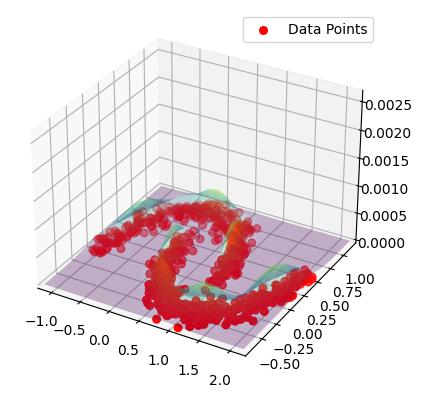

In [115]:
def GMM(components, n_samples, visualize = False):
    X, _ = make_moons(n_samples=n_samples, noise=NOISE)
    # Initialize parameters
    np.random.seed(0)
    mu = np.random.rand(components, 2)  # Random initial means
    cov = np.array([np.eye(2)] * components)  # Initialize with identity covariance matrices
    weights = np.ones(components) / components  # Equal component weights

    # Define the number of iterations
    n_iterations = 100

    # Create a grid for visualization
    x, y = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100), np.linspace(X[:, 1].min(), X[:, 1].max(), 100))


    for _ in range(n_iterations):
        # Expectation step: Calculate responsibilities
        responsibilities = np.zeros((len(X), components))
        for i in range(components):
            responsibilities[:, i] = weights[i] * multivariate_normal.pdf(X, mean=mu[i], cov=cov[i])
        responsibilities /= responsibilities.sum(axis=1)[:, np.newaxis]

        # Maximization step: Update parameters
        N_k = responsibilities.sum(axis=0)
        weights = N_k / len(X)
        for i in range(components):
            mu[i] = (1 / N_k[i]) * np.sum(X * responsibilities[:, i][:, np.newaxis], axis=0)
            cov[i] = (1 / N_k[i]) * np.dot((responsibilities[:, i][:, np.newaxis] * (X - mu[i])).T, (X - mu[i])) + 1e-6 * np.eye(2)

        # Calculate the PDF for the entire grid
        pdf = np.zeros(x.shape)
        for i in range(components):
            pdf += weights[i] * multivariate_normal.pdf(np.dstack((x, y)), mean=mu[i], cov=cov[i])
    # normalize
    pdf /= pdf.sum()

    if visualize:# Visualize the PDF surface
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(x, y, pdf, cmap='viridis', alpha=0.3)

        # Set the extent (limits) of the plot for X, Y, and Z
        ax.set_xlim(X[:, 0].min(), X[:, 0].max())
        ax.set_ylim(X[:, 1].min(), X[:, 1].max())
        ax.set_zlim(0, pdf.max())  # Adjust the Z-axis limit based on your data and PDF

        # Visualize the data points
        ax.scatter(X[:, 0], X[:, 1], np.zeros(len(X)), c='r', marker='o', s=30, label="Data Points")

        plt.legend()
        plt.show()
    return pdf

gmm = GMM(8, 700, True)

<div style="color: green; font-weight: bold">
Regarding the implementation of the GMM itself, it is basically identical. 
The above comments regarding class vs function, visualisation, prediction and sampling still apply. 
In addition our plot is worthy of criticism though, 2D surfaces work better if the plot is interactive like it is with matplotlib when not using jupyter. 
</div>

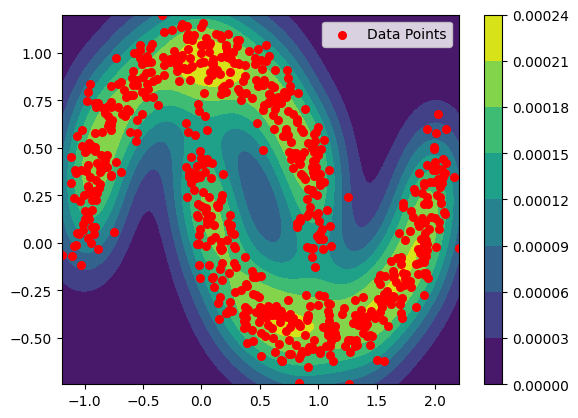

In [116]:
def kernel(point, datapoint, BANDWIDTH):
    return np.exp(-((point - datapoint) ** 2).sum() / 2 / BANDWIDTH**2)

def KDE(BANDWIDTH, n_samples, visualize = False):# Define the kernel function (Squared Exponential Kernel)
    X, _ = make_moons(n_samples=n_samples, noise=NOISE)

    # Create a grid for visualization
    x, y = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100), np.linspace(X[:, 1].min(), X[:, 1].max(), 100))

    # Initialize the KDE estimate
    pdf = np.zeros(x.shape)

    # Compute the KDE estimate for each point on the grid
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            point = np.array([x[i, j], y[i, j]])
            for data_point in X:
                pdf[i, j] += kernel(point, data_point, BANDWIDTH)

    # Normalize the PDF to represent a probability density
    pdf /= pdf.sum()

    if visualize:# Visualize the KDE estimate
        plt.contourf(x, y, pdf, cmap='viridis')
        plt.colorbar()
        plt.scatter(X[:, 0], X[:, 1], c='r', marker='o', s=30, label="Data Points")
        plt.legend()
        plt.show()
    
    return pdf


kde = KDE(0.2, 700, True)

In [117]:
# def kernelexpectation(data1, data2, kernel): # returns E[k(data1, data2)]
#     n = len(data1)
#     if n != len(data2):
#         raise ValueError("the two data arrays entered should have the same length")
    
#     expectation = 0
#     for i in range(n):
#         for j in range(n):
#             expectation += kernel(data1[i], data2[j]) # shall we correct for i==j?
#     return expectation / n / (n-1)

# def MMD(data, refference, kernel):
#     return kernelexpectation(data, data, kernel) + kernelexpectation(refference, refference, kernel) - 2*kernelexpectation(data, refference, kernel)


# Maximum mean discrepancy (MMD) for evaluating generative models
def MMD(data1, data2, kernel, h=1):
  # data1, data2: two datasets, n x 2
  # kernel: a kernel function: squared exponential kernel or inverse multi-quadratic kernel
  # return: MMD
  if kernel == 'squared_exponential':
    Kx = np.exp(-0.5 * np.square(data1[:, None] - data1).sum(axis=2) / h)
    Ky = np.exp(-0.5 * np.square(data2[:, None] - data2).sum(axis=2) / h)
    Kxy = np.exp(-0.5 * np.square(data1[:, None] - data2).sum(axis=2) / h)
  elif kernel == 'inverse_multi_quadratic':
    Kx = 1/(1 + np.square(data1[:, None] - data1).sum(axis=2) / h)
    Ky = 1/(1 + np.square(data2[:, None] - data2).sum(axis=2) / h)
    Kxy = 1/(1 + np.square(data1[:, None] - data2).sum(axis=2) / h)
  else:
    raise ValueError("Invalid kernel. Choose either 'squared_exponential' or 'inverse_multi_quadratic'.")
  
  M = data1.shape[0]
  N = data2.shape[0]
  c1 = 1 / (M * (M - 1))
  c2 = 1 / (N * (N - 1))
  c3 = 2 / (M * N)
  return c1 * (Kx.sum() - np.trace(Kx)) + c2 * (Ky.sum() - np.trace(Ky)) - c3 * Kxy.sum()

In [118]:
# define kernels
def squared_exponential(x, y, sigma = 0.2):
    return np.exp( -( (x-y)**2 ).sum() / (2 * sigma**2) )
def multi_quadratic(x, y, sigma = 0.2):
    return 1 / ( 1 + ( (x-y)**2 ).sum() / (2 * sigma**2) )

kernel:  squared_exponential estimator:  histogram
hyperparameter:  10 n_samples:  500
hyperparameter:  10 n_samples:  600
hyperparameter:  10 n_samples:  700
hyperparameter:  20 n_samples:  500
hyperparameter:  20 n_samples:  600
hyperparameter:  20 n_samples:  700
hyperparameter:  30 n_samples:  500
hyperparameter:  30 n_samples:  600
hyperparameter:  30 n_samples:  700
hyperparameter:  40 n_samples:  500
hyperparameter:  40 n_samples:  600
hyperparameter:  40 n_samples:  700
hyperparameter:  50 n_samples:  500
hyperparameter:  50 n_samples:  600
hyperparameter:  50 n_samples:  700
hyperparameter:  60 n_samples:  500
hyperparameter:  60 n_samples:  600
hyperparameter:  60 n_samples:  700


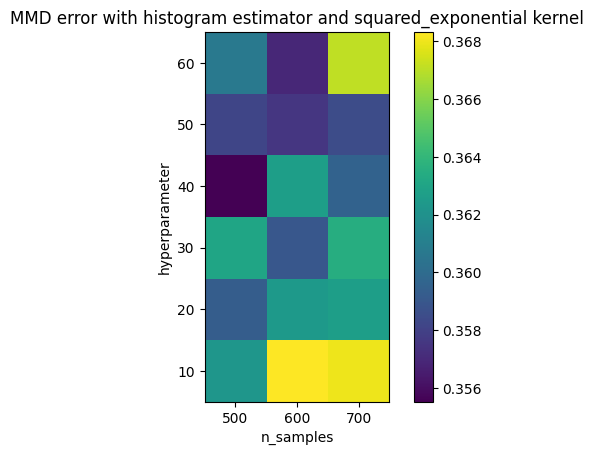

kernel:  squared_exponential estimator:  gaussian
hyperparameter:  0 n_samples:  500
hyperparameter:  0 n_samples:  600
hyperparameter:  0 n_samples:  700


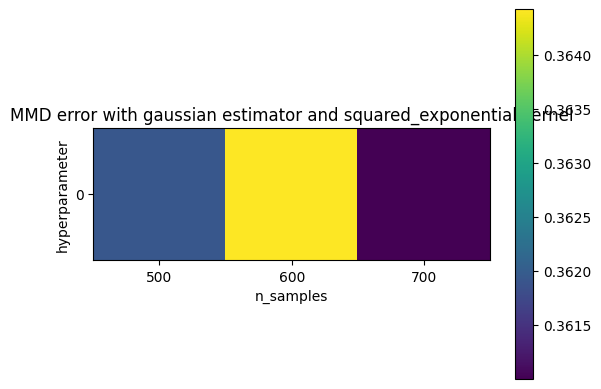

kernel:  squared_exponential estimator:  GMM
hyperparameter:  5 n_samples:  500
hyperparameter:  5 n_samples:  600
hyperparameter:  5 n_samples:  700
hyperparameter:  10 n_samples:  500
hyperparameter:  10 n_samples:  600
hyperparameter:  10 n_samples:  700
hyperparameter:  15 n_samples:  500
hyperparameter:  15 n_samples:  600
hyperparameter:  15 n_samples:  700
hyperparameter:  20 n_samples:  500
hyperparameter:  20 n_samples:  600
hyperparameter:  20 n_samples:  700
hyperparameter:  25 n_samples:  500
hyperparameter:  25 n_samples:  600
hyperparameter:  25 n_samples:  700
hyperparameter:  30 n_samples:  500
hyperparameter:  30 n_samples:  600
hyperparameter:  30 n_samples:  700


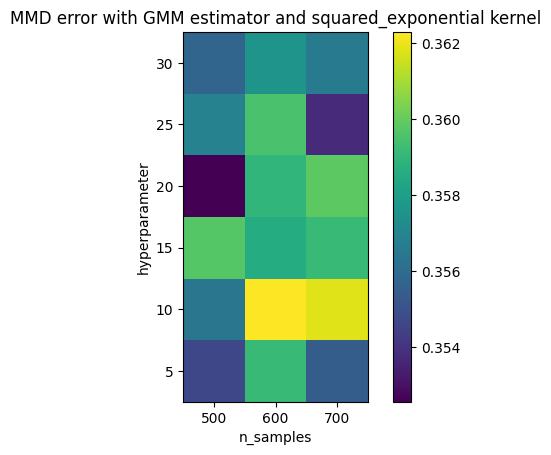

kernel:  squared_exponential estimator:  KDE
hyperparameter:  0.1 n_samples:  500
hyperparameter:  0.1 n_samples:  600
hyperparameter:  0.1 n_samples:  700
hyperparameter:  0.2 n_samples:  500
hyperparameter:  0.2 n_samples:  600
hyperparameter:  0.2 n_samples:  700
hyperparameter:  0.3 n_samples:  500
hyperparameter:  0.3 n_samples:  600
hyperparameter:  0.3 n_samples:  700
hyperparameter:  0.4 n_samples:  500
hyperparameter:  0.4 n_samples:  600
hyperparameter:  0.4 n_samples:  700
hyperparameter:  0.5 n_samples:  500
hyperparameter:  0.5 n_samples:  600
hyperparameter:  0.5 n_samples:  700


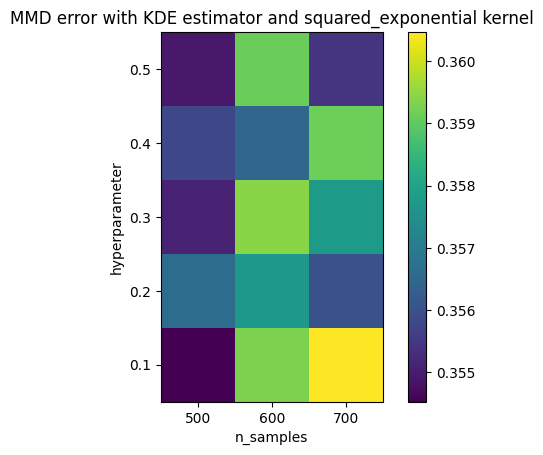

In [128]:
def visualiseMMD(estimator, kernel, hyperparameters_list, n_samples_list): # Shall we include the training set size as a function parameter?
    mmd = np.zeros((len(hyperparameters_list), len(n_samples_list)))
    print("kernel: ", kernel, "estimator: ", estimator.__name__)
    for hyper in hyperparameters_list:
        for n_samples in n_samples_list:
            print("hyperparameter: ", hyper, "n_samples: ", n_samples)
            # Number of samples to generate
            n = len(X[:, 0])
            # some values of X for later
            x0, y0 = X[0, 0], X[0, 1]
            xspan, yspan = X[-1, 0] - X[0, 0], X[-1, 1] - X[0, 1]

            # Generate random samples from the CDF
            samples = []

            if estimator == gaussian:
                pdf = estimator(n_samples, False)
            else:
                pdf = estimator(hyper, n_samples, False)
            pdf_length = len(pdf)
            # Create a flat copy of the array
            flat = pdf.flatten()

            for _ in range(n):
                # Then, sample an index from the 1D array with the
                # probability distribution from the original array
                sample_index = np.random.choice(a=flat.size, p=flat)

                # Take this index and adjust it so it matches the original array
                adjusted_index = np.unravel_index(sample_index, pdf.shape)
                # calculate x,y from index
                sample = [x0 + adjusted_index[0] * xspan/pdf_length , y0 + adjusted_index[1] * yspan/pdf_length ]
                samples.append(sample)

            mmd[hyperparameters_list.index(hyper), n_samples_list.index(n_samples)] = MMD(X, np.array(samples), kernel)

    # Visualize the MMD error in a heatmap
    plt.imshow(mmd, interpolation='nearest', origin='lower')
    
    # Set the tick locations and labels
    plt.xticks(np.arange(len(n_samples_list)), n_samples_list)
    plt.yticks(np.arange(len(hyperparameters_list)), hyperparameters_list)

    # label the axes
    plt.xlabel('n_samples')
    plt.ylabel('hyperparameter')
    plt.title('MMD error with ' + estimator.__name__ + ' estimator and ' + kernel + ' kernel')
    plt.colorbar()
    plt.show()

# histogram
visualiseMMD(histogram, 'squared_exponential', hyperparameters_list = [10, 20, 30, 40, 50, 60], n_samples_list = [500, 1000, 3000])

# gaussian
visualiseMMD(gaussian, 'squared_exponential', hyperparameters_list = [0], n_samples_list = [500, 1000, 3000])

# GMM
visualiseMMD(GMM, 'squared_exponential', hyperparameters_list = [5, 10, 15, 20, 25, 30], n_samples_list = [500, 1000, 3000])

# KDE
visualiseMMD(KDE, 'squared_exponential', hyperparameters_list = [0.1, 0.2, 0.3, 0.4, 0.5], n_samples_list = [500, 1000, 3000])

Findings: KDE and GMM seems to perform better than histogram and .

# 2. Higher-dimensional data

(1797, 64)


(array([178., 182., 177., 183., 181., 182., 181., 179., 174., 180.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

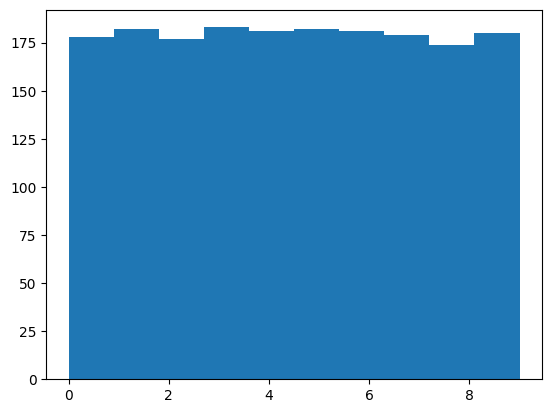

In [129]:
from sklearn.datasets import load_digits
from sklearn.neighbors import KDTree


digits = load_digits() 
X = digits.data
y = digits.target
print(X.shape)

# train a classifier based on the original data
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0, n_estimators=1000)
clf.fit(X, y)

# histogram of the original data
plt.hist(y)

In [47]:
# from quantile_forest import RandomForestQuantileRegressor
# we chose the density forests to replace the histogram 
from DensityForest import DensityForest
from DensityTree import RandomDensityTree

tree = RandomDensityTree()
# # fit the model
# d_forest = DensityForest(n_estimators=5,max_depth=10,num_splits=10,min_infogain=1.5,boostrap=False)
# d_forest.fit(X)


# # generate new data
# d_forest.predict(X)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 2 and the array at index 1 has size 64

(61,) (61, 61)
(1797, 64)
MMD with one single gaussian:  5.15291619389248e-13


(array([ 69.,  53., 217., 156.,  70., 111., 143., 146., 512., 320.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

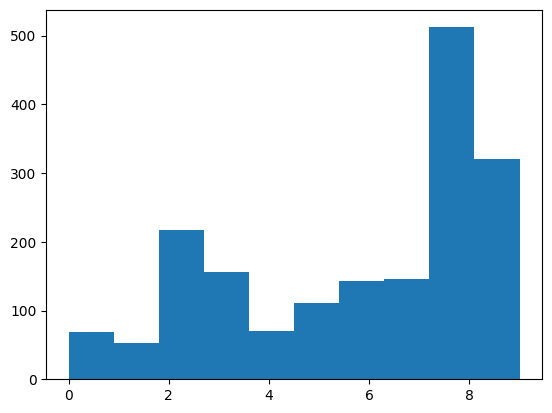

In [109]:
# One single gaussian to fit the data
# use a multi-variate gaussian to fit the data
from scipy.stats import multivariate_normal

# Find constant features
constant_features_indices = np.where(np.std(X, axis=0) == 0)[0]
constant_features_values = X[0, constant_features_indices][0]

# Remove constant features
X_filtered = np.delete(X, constant_features_indices, axis=1)

# fit the model
mu = np.mean(X_filtered, axis=0)
cov = np.cov(X_filtered.T)
print(mu.shape, cov.shape)
pdf = multivariate_normal(mean=mu, cov=cov)

# generate new data
X_new = pdf.rvs(X.shape[0])

# insert the constant features back
X_new = np.insert(X_new, constant_features_indices, constant_features_values, axis=1)

# integerize the data
X_new = np.round(X_new).astype(int)
print(X_new.shape)
# caculate the MMD
print('MMD with one single gaussian: ', MMD(X, X_new, 'squared_exponential'))

# classify the new data and visualize the frequency of each class
y_new = clf.predict(X_new)
plt.hist(y_new)


(1797, 64)
MMD with GMM:  5.15291619389248e-13
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([166, 125, 176, 180, 179, 147, 198, 213, 229, 184], dtype=int64))


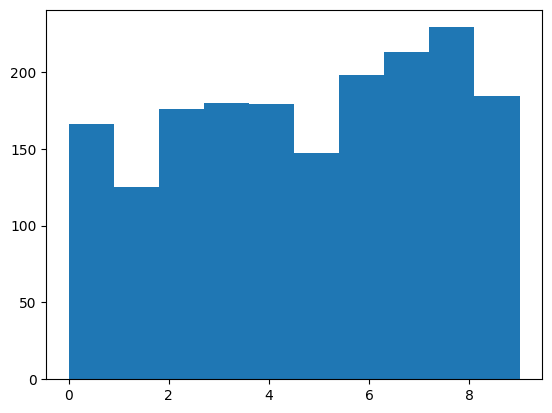

In [103]:
# a Gaussian mixture model to fit the data
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=10, covariance_type='full').fit(X)
# generate new data
X_new = gmm.sample(X.shape[0])[0]
print(X_new.shape)
# caculate the MMD
print('MMD with GMM: ', MMD(X, X_new, 'squared_exponential'))

# classify the new data and visualize the frequency of each class
y_new = clf.predict(X_new)
plt.hist(y_new)
# check whether the 10 digits are generated in equal frequency
print(np.unique(y_new, return_counts=True))

MMD with KDE:  -0.00026985861865728473
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([154, 168, 188, 192, 179, 194, 169, 183, 169, 201], dtype=int64))


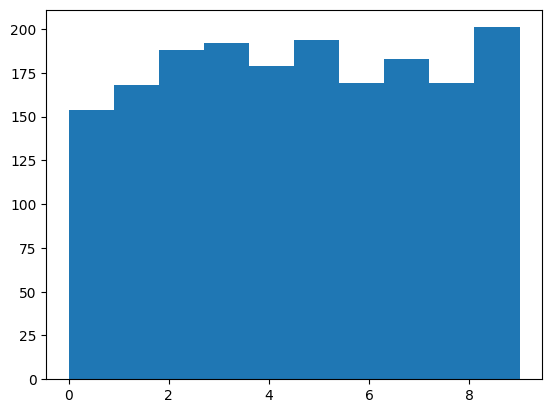

In [106]:
# a kernel density estimation to fit the data and use KDtree to speed up the computation
# from sklearn.neighbors import KDTree

# # Fit the KDTree with your data
# tree = KDTree(X, leaf_size=2)

# # Query the KDTree for the nearest neighbors
# dist, ind = tree.query(X, k=2)  # k=2 means find the 2 nearest neighbors

# # Now you can use 'dist' and 'ind' in your kernel density estimation

# a kernel density estimation to fit the data
from sklearn.neighbors import KernelDensity
kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(X)


# generate new data
X_new = kde.sample(X.shape[0])

# caculate the MMD
print('MMD with KDE: ', MMD(X, X_new, 'squared_exponential'))

# classify the new data and visualize the frequency of each class
y_new = clf.predict(X_new)
plt.hist(y_new)
# check whether the 10 digits are generated in equal frequency
print(np.unique(y_new, return_counts=True))

Findings: The KDE performs better than GMM and single Gaussian since it can generate more balanced sample